# Convolutional Variational Auto Encoder sample using tensorflow

tensorflow を利用して MNIST で CVAE を実行するサンプルです。

- [Convolutional Variational Autoencoder][tutorial]

[tutorial]: https://www.tensorflow.org/tutorials/generative/cvae

## 環境の確認

In [1]:
!cat /etc/issue

Ubuntu 18.04.3 LTS \n \l



In [2]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        545M         10G        892K        2.0G         11G
Swap:            0B          0B          0B


In [3]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits 

In [4]:
!nvidia-smi

Fri Oct 11 09:09:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
!python --version

Python 3.6.8


In [0]:
from logging import Logger


def get_logger() -> Logger:
    import logging
    logger = logging.getLogger(__name__)

    fmt = "%(asctime)s %(levelname)s %(name)s :%(message)s"
    logging.basicConfig(level=logging.INFO, format=fmt)

    return logger


logger = get_logger()

In [7]:
!pip install -q tensorflow-gpu==2.0.0
def check_tf_version() -> None:
    import tensorflow as tf
    logger.info(tf.__version__)


check_tf_version()

     |████████████████████████████████| 380.8MB 69kB/s 
     |████████████████████████████████| 3.8MB 32.7MB/s 
     |████████████████████████████████| 450kB 42.5MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.


2019-10-11 09:09:56,133 INFO __main__ :2.0.0


## ソースコードの取得

In [8]:
# 対象のコードを取得
!git clone -n https://github.com/iimuz/til.git
%cd til
!git checkout 184b032
%cd python/cvae_tensorflow

Cloning into 'til'...
remote: Enumerating objects: 679, done.
remote: Counting objects: 100% (679/679), done.
remote: Compressing objects: 100% (436/436), done.
remote: Total 679 (delta 275), reused 603 (delta 211), pack-reused 0
Receiving objects: 100% (679/679), 2.34 MiB | 7.15 MiB/s, done.
Resolving deltas: 100% (275/275), done.
/content/til
Note: checking out '184b032'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 184b032 refact: フォルダ構成を修正
/content/til/python/cvae_tensorflow


## 実行

### データセットの確認

2019-10-11 09:09:59,586 INFO __main__ :eager execution: True


11493376/11490434 [==============================] - 0s 0us/step


2019-10-11 09:10:01,716 INFO __main__ :train_dataset: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


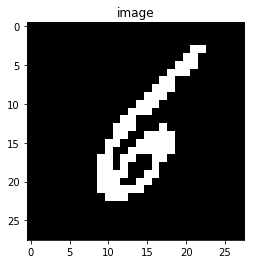

In [9]:
%run -i dataset.py

In [0]:
import dataset


raw_train, raw_test = dataset.get_batch_dataset()

### ネットワークの確認

In [11]:
%run -i network.py

2019-10-11 09:10:03,645 INFO __main__ :eager execution: True


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               230500    
Total params: 249,316
Trainable params: 249,316
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1568)              79968     
____________________________

### 学習の実行

2019-10-11 09:23:26,003 INFO __main__ :Epoch: 99, Test set ELBO: -78.64562225341797, time elapse for current epoch 6.0481181144714355


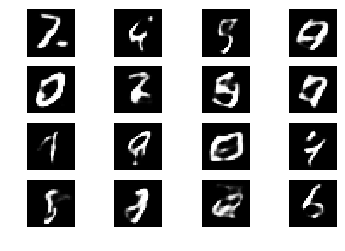

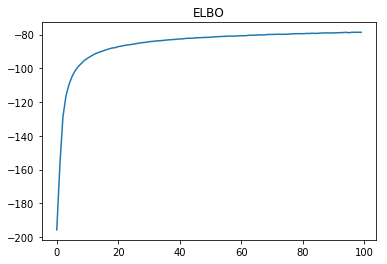

In [12]:
import time

from IPython import display

import dataset
import train
import utils

def training() -> None:
    logger.info(f"eager execution: {tf.executing_eagerly()}")

    epochs = 100
    latent_dim = 50
    num_example_to_generate = 16
    random_vector_for_generation = tf.random.normal(
        shape=[num_example_to_generate, latent_dim]
    )
    history_filepath = "_data/history.pkl"
    history_image_filepath = "_data/history.png"

    train_dataset, test_dataset = dataset.get_batch_dataset(
        train_buff=60000, batch_size=128
    )
    model = CVAE(latent_dim)
    optimizer = tf.keras.optimizers.Adam(1e-4)

    checkpoint, checkpoint_manager = utils.get_checkpoint_and_manager(
        save_dir="_data/ckpts", max_to_keep=3, model=model, optimizer=optimizer
    )
    utils.restore_latest(checkpoint, checkpoint_manager)
    elbo_history = train.restore_history(history_filepath)

    start_epoch = checkpoint.save_counter.numpy()
    for epoch in range(start_epoch, epochs):
        start_time = time.time()
        for train_x in train_dataset:
            train.compute_apply_gradients(model, train_x, optimizer)
        end_time = time.time()

        checkpoint_manager.save()

        loss = tf.keras.metrics.Mean()
        for test_x in test_dataset:
            loss(train.compute_loss(model, test_x))
        elbo_history.append(-loss.result())

        if display is not None:
            display.clear_output(wait=False)
        logger.info(
            f"Epoch: {epoch}"
            f", Test set ELBO: {elbo_history[-1]}"
            f", time elapse for current epoch {end_time - start_time}"
        )
        predictions = model.sample(random_vector_for_generation)
        train.show_and_save_images(predictions, f"_data/image_at_epoch_{epoch:04d}.png")
        train.show_and_save_history(elbo_history, history_image_filepath)
        train.save_history(elbo_history, history_filepath)


training()

### 結果

In [13]:
import utils

import IPython
from IPython import display

def show_generated_images():
    filepath = "_data/dcgan.gif"
    utils.save_gif("_data/", "image_at_epoch_*", filepath)

    try:
        from google.colab import files
    except ImportError:
        pass
    else:
        files.download(filepath)


show_generated_images()

2019-10-11 09:23:27,274 INFO utils :write gif from _data/image_at_epoch_0000.png
2019-10-11 09:23:27,294 INFO utils :write gif from _data/image_at_epoch_0001.png
2019-10-11 09:23:27,313 INFO utils :write gif from _data/image_at_epoch_0002.png
2019-10-11 09:23:27,334 INFO utils :write gif from _data/image_at_epoch_0003.png
2019-10-11 09:23:27,352 INFO utils :write gif from _data/image_at_epoch_0004.png
2019-10-11 09:23:27,371 INFO utils :write gif from _data/image_at_epoch_0005.png
2019-10-11 09:23:27,391 INFO utils :write gif from _data/image_at_epoch_0006.png
2019-10-11 09:23:27,415 INFO utils :write gif from _data/image_at_epoch_0007.png
2019-10-11 09:23:27,433 INFO utils :write gif from _data/image_at_epoch_0008.png
2019-10-11 09:23:27,451 INFO utils :write gif from _data/image_at_epoch_0009.png
2019-10-11 09:23:27,470 INFO utils :write gif from _data/image_at_epoch_0010.png
2019-10-11 09:23:27,489 INFO utils :write gif from _data/image_at_epoch_0011.png
2019-10-11 09:23:27,507 INFO

KeyboardInterrupt: ignored